# 6. Quick overview about plotting data (e.g. for exploration)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 14]
import pandas as pd

In [4]:
data = pd.read_csv("Data/online_orders.csv")
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


### Scatter plots

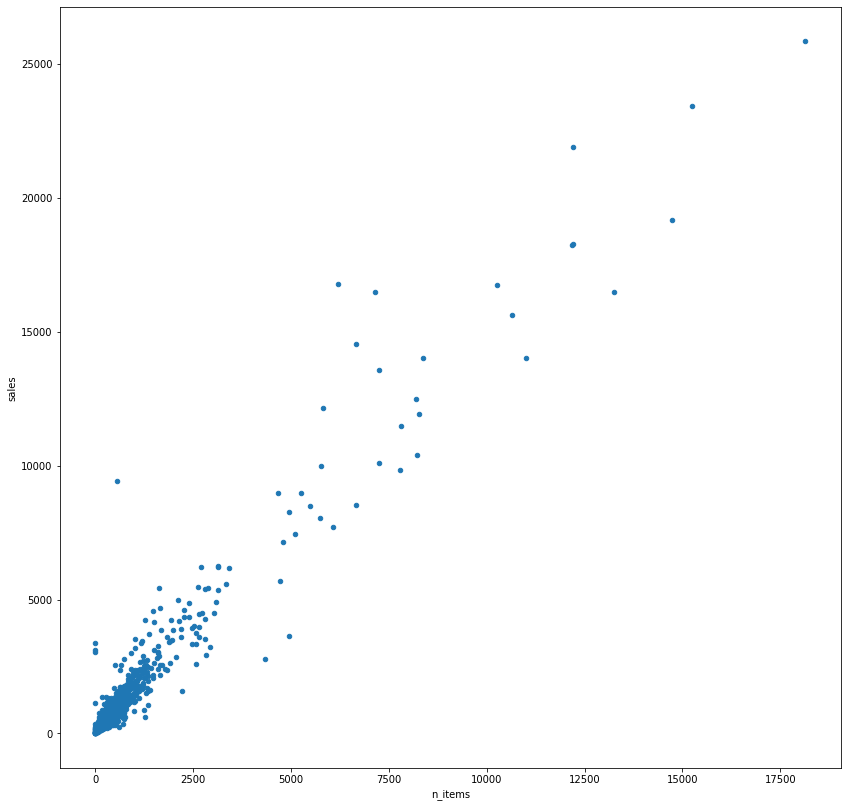

In [5]:
data.plot.scatter(x='n_items', y='sales');

**Note**: You see that I add a semicolon (;) at the end of the cell, that is because jupyter notebooks by default return the last value., so if I run the cell without the notebook, the plot object *(some random thing like `matplotlib.axes._subplots.AxesSubplot..`)* will be displayed.

### Line Chart

We use line charts generally when we want to see the trend of one (or many variables) over time. For example, let's say we want to see the sales in germany compared to france over time. Pandas `plot` method tries a line plot by default.

We can set the index of the dataframe to the date and pandas plot method will automatically pick it up as the x axis

In [6]:
data_indexed = data.set_index('date')
data_indexed.head()

,country,sales,n_items,n_orders,day_of_week
date,,,,,
2010-12-01,Australia,358.25,107,1,2
2010-12-08,Australia,258.90,214,1,2
2010-12-17,Australia,415.70,146,1,4
2011-01-06,Australia,7154.38,4802,2,3
2011-01-10,Australia,81.60,96,1,0


Pandas plotting library is just a thin wrapper around matplotlib. Matplotlib has a somewhat convoluted api, and pandas makes plotting common charts much easier.

For example, here we call directly matplotlib `legend` to display the legend on top of pandas plots

/Users/katharina/.virtualenvs/scc01/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


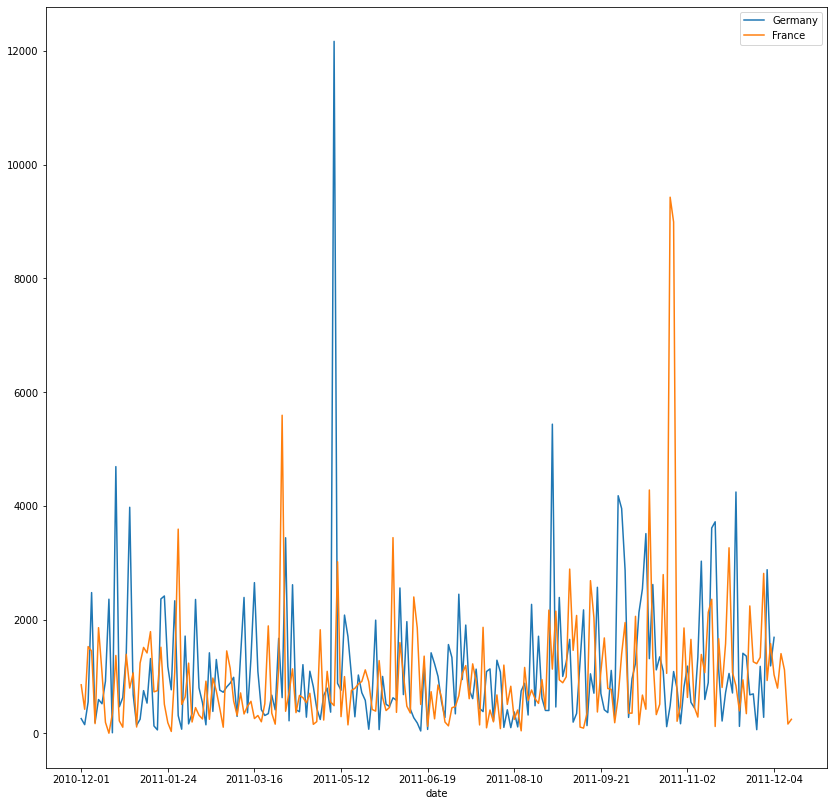

In [7]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend();

### Histograms
We can use histograms to make sure that nothing is fishy with the data, as well as to gain an understanding of its distribution. For example, we can use it to see how are sales distributed in EIRE

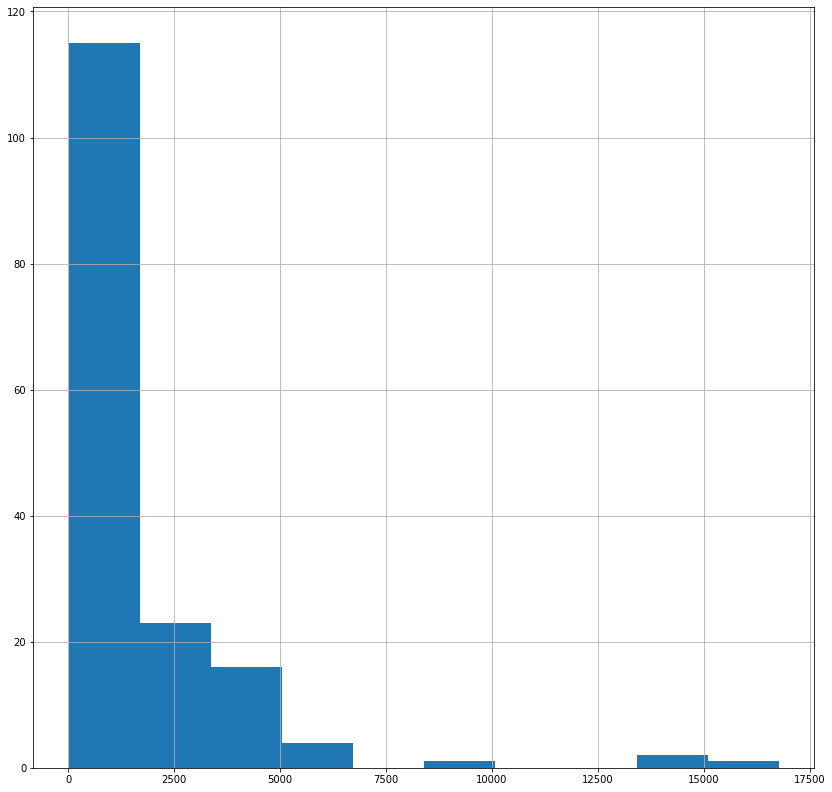

In [8]:
# same thing as data[data.country=='EIRE'].sales.plot(kind="hist");
data[data.country=='EIRE'].sales.hist();

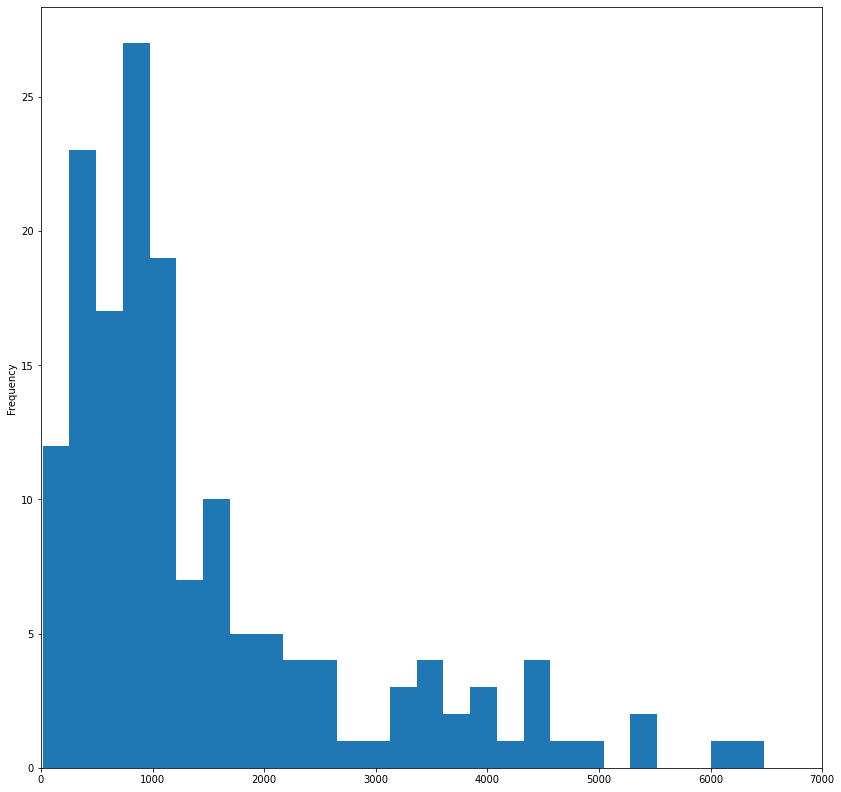

In [9]:
# set a limit for x and change the number of bins
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

### Boxplot 
The box plot (also called plot and whisker diagram) is a good chart when you want to compare how a variable is distributed among different groups. For example, on the chart of the left, we are analyzing the weight of all different car models manufactured in 2004 and comparing between the region of origin of those cars

Outliers on the boxplot (those points beyond the whiskers) are usually considered as being 1.5* IQ from Quartile 1 (low outliers) and 1.5*IQ from Quartile 3 (high outliers)

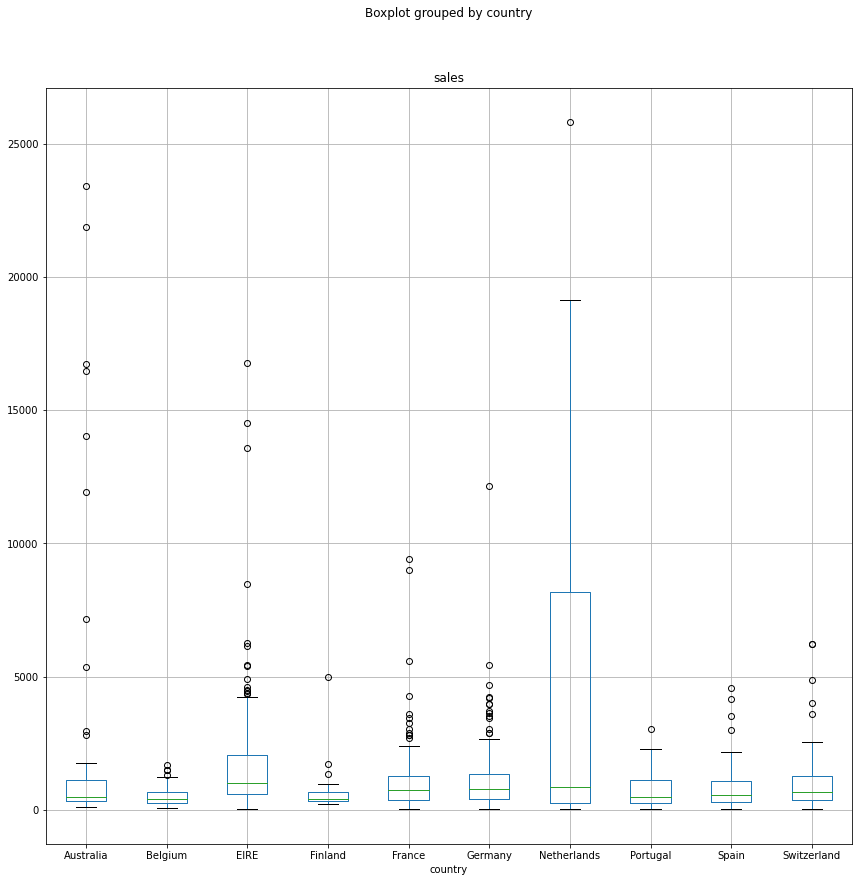

In [10]:
# tbd 
data.boxplot(column="sales", by="country");

### Labels and titles

Finally, if we wanted to share our plot with someone else (to display on a paper or to share with a client) we can make use of matplotlib customization to make our plot more explicit and nicer looking

For example, we can choose the style of another library *(ggplot, the most famous R plotting library)*

In [11]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = [14, 14] # bigger plots

Here we customize the chart to make it ready to be shared. We apply the following modifications:

- We use `label` inside the `plot` function to asign a label to each plot. This will draw each line a different color, and will display their name on the legend.
- We activate the plot legend with `plt.legend`
- We add a title with `plt.legend` (size 25)
- We set the range for the y-axis to (0, 12350)
- We add a legend for the x axis with `plt.xlabel` (size 20 inches)
- We add a legend for the y axis with `plt.ylabel` (size 20 inches)
- We add text on a specific position (Starting 54% from the left and 0.8% from the bottom, need to try multiple times to see what looks good)

/Users/katharina/.virtualenvs/scc01/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


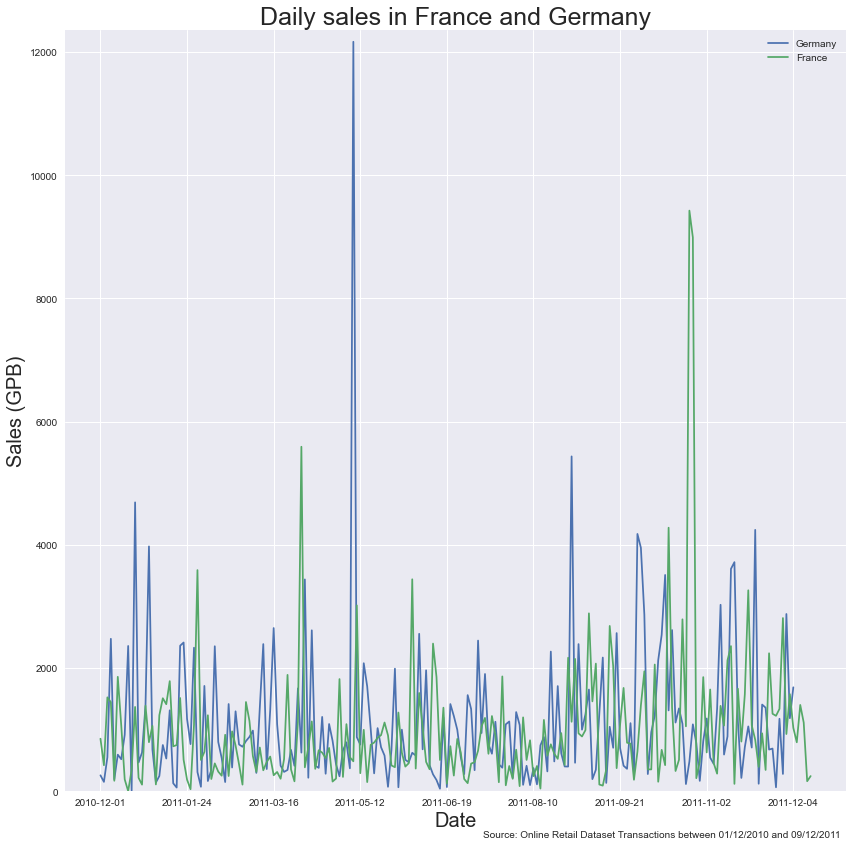

In [12]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.ylim(0, 12350)
plt.legend()
plt.title("Daily sales in France and Germany", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("Sales (GPB)", size=20)
plt.figtext(.54, .08, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011");

### Seaborn package

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [13]:
import seaborn as sns
sns.set(style="white") #white background  style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

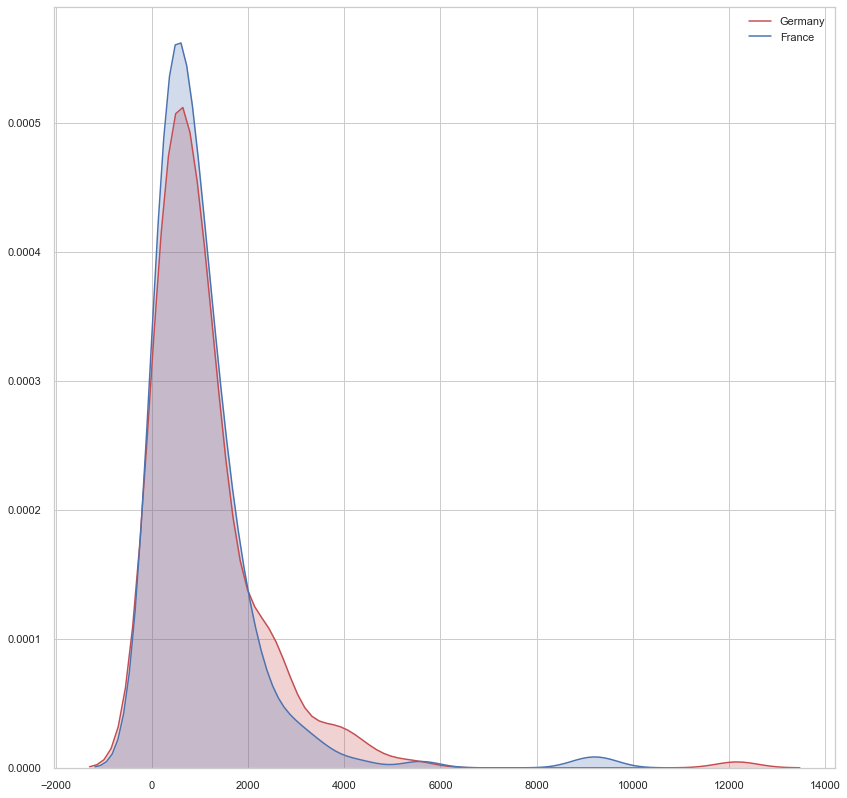

In [14]:
# one example of plotting density of a variable on certain conditions for comparison reasons
sns.kdeplot(data_indexed["sales"][data_indexed.country=='Germany'], color = 'r', shade = True)
sns.kdeplot(data_indexed["sales"][data_indexed.country=='France'], color = 'b', shade = True)

plt.legend(['Germany', 'France'])
plt.show()

# 7. Model builing with Scikit-Learn

We will use the scikit-learn library to create our models. When coding, this library is written as sklearn. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:

- **Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- **Fit:** Capture patterns from provided data. This is the heart of modeling.
- **Predict:** Just what it sounds like
- **Evaluate:** Determine how accurate the model's predictions are.


Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

## Load data and define the target variable y and the features (X)

In [15]:
data = pd.read_csv("Data/online_orders.csv")
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


In [16]:
y = data.sales
features = ['n_items', 'n_orders', 'day_of_week']
X = data[features]

We want to split our data in train and test data. The scikit-learn library has a function train_test_split to break up the data into two pieces.

In [17]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Specify and Fit Model

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
sales_model = DecisionTreeRegressor(random_state=1)

# Fit model
sales_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

## Predict
We now have a fitted model that we can use to make predictions.

In [19]:
predicted_sales = sales_model.predict(val_X)
predicted_sales[0:20]

array([  640.5 ,   301.52, 14022.92,   441.92,  1097.16,  5355.4 ,
         489.1 ,   558.96,  1679.7 ,  1347.05, 19150.66,   168.  ,
        2128.03,  8488.86,  1392.  ,  1680.03,   695.87,  3120.71,
         915.46,   284.25])

## Evaluation
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error: <br>
`error = actual - predicted` <br>
With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. <br>
`MAE = mean(abs(error))` <br>
Here is how we calculate the mean absolute error with sklearn:

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_y, predicted_sales)

443.4077272727273

That's huge! Well we had just a playground data and won't pay a lot attention on this result, however in a real project you definitely should!

There are many ways to improve this model, such as experimenting to find better features or different model types.